House prices are skewed because most houses are in a close price range, but there are outliers, very expensive houses which can negatively affect the result of OLS, by causing the model to have suboptimum estimates.

Linear regression is a statistical method of modeling the relationship between the predictor and response. It fits a straight line based on the OLS calculation.

Traditional linear regression is sensitive to outliers beacuse the errors are squared, so the big errors affect the model more than the small errors.

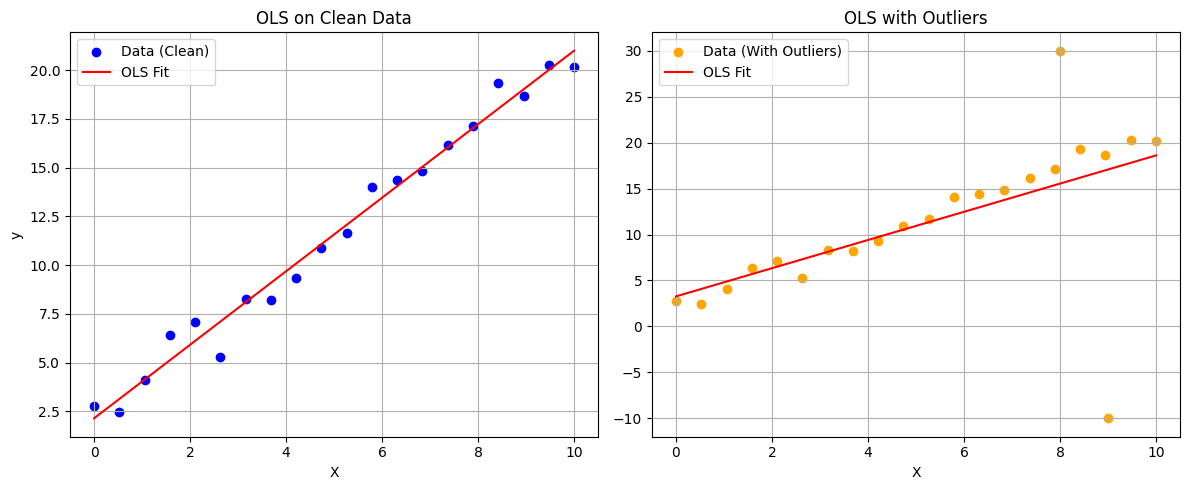

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create clean linear data
np.random.seed(0)
X = np.linspace(0, 10, 20)
y = 2 * X + 1 + np.random.normal(0, 1, size=X.shape)

# Reshape for sklearn
X_reshaped = X.reshape(-1, 1)

# Step 2: Fit OLS to clean data
model_clean = LinearRegression().fit(X_reshaped, y)
y_pred_clean = model_clean.predict(X_reshaped)

# Step 3: Add outliers
X_out = np.append(X, [8, 9])
y_out = np.append(y, [30, -10])
X_out_reshaped = X_out.reshape(-1, 1)

# Step 4: Fit OLS to data with outliers
model_outliers = LinearRegression().fit(X_out_reshaped, y_out)
y_pred_outliers = model_outliers.predict(X_reshaped)

# Step 5: Plot
plt.figure(figsize=(12, 5))

# Left: Clean data
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Data (Clean)', color='blue')
plt.plot(X, y_pred_clean, color='red', label='OLS Fit')
plt.title("OLS on Clean Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Right: With outliers
plt.subplot(1, 2, 2)
plt.scatter(X_out, y_out, label='Data (With Outliers)', color='orange')
plt.plot(X, y_pred_outliers, color='red', label='OLS Fit')
plt.title("OLS with Outliers")
plt.xlabel("X")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The plots above show that the line fits the data better when there are no outliers.

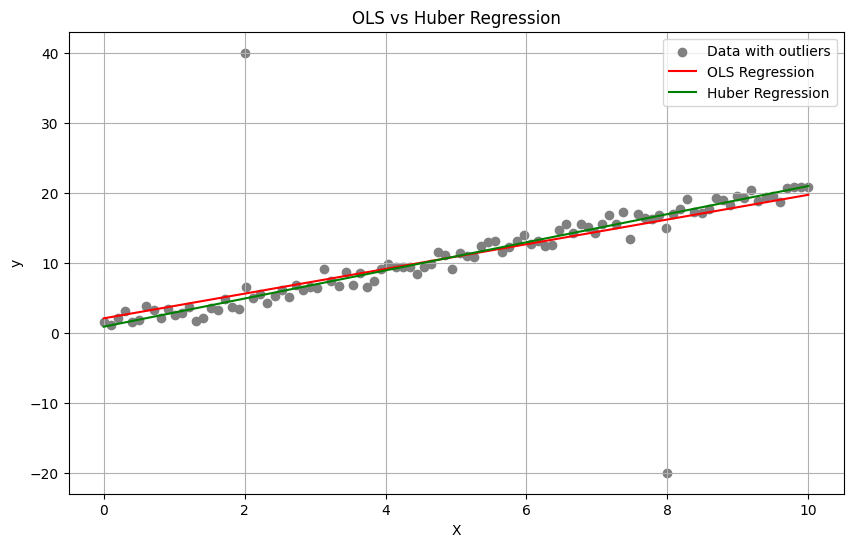

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1, size=X.shape)

# Add outliers
X_out = np.append(X, [2, 8])
y_out = np.append(y, [40, -20])

X_out = X_out.reshape(-1, 1)

# Fit models
ols = LinearRegression().fit(X_out, y_out)
huber = HuberRegressor().fit(X_out, y_out)

# Predictions
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_ols = ols.predict(x_plot)
y_huber = huber.predict(x_plot)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_out, y_out, color='gray', label='Data with outliers')
plt.plot(x_plot, y_ols, color='red', label='OLS Regression')
plt.plot(x_plot, y_huber, color='green', label='Huber Regression')
plt.legend()
plt.title("OLS vs Huber Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

The plot above shows the comparisson of OLS Regression and the Huber loss model which is designed to combat outliers and seems to fit the data better than OLS Regression.

In [4]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
from sklearn.linear_model import LinearRegression, HuberRegressor
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Robust Regression Playground"),
    html.Label("Number of Outliers:"),
    dcc.Slider(id='outliers', min=0, max=10, step=1, value=3),
    dcc.Graph(id='regression-plot')
])

@app.callback(
    Output('regression-plot', 'figure'),
    Input('outliers', 'value'))
def update_plot(n_outliers):
    # Data
    np.random.seed(42)
    X = np.linspace(0, 10, 50)
    y = 2 * X + 1 + np.random.normal(0, 1, size=X.shape)

    if n_outliers > 0:
        X_outliers = np.random.uniform(0, 10, n_outliers)
        y_outliers = np.random.uniform(-30, 30, n_outliers)
        X_all = np.concatenate([X, X_outliers])
        y_all = np.concatenate([y, y_outliers])
    else:
        X_all = X
        y_all = y

    X_all = X_all.reshape(-1, 1)

    # Fit models
    ols = LinearRegression().fit(X_all, y_all)
    huber = HuberRegressor().fit(X_all, y_all)
    x_pred = np.linspace(0, 10, 100).reshape(-1, 1)

    # Predictions
    y_ols = ols.predict(x_pred)
    y_huber = huber.predict(x_pred)

    # Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X_all.flatten(), y=y_all, mode='markers', name='Data'))
    fig.add_trace(go.Scatter(x=x_pred.flatten(), y=y_ols, mode='lines', name='OLS'))
    fig.add_trace(go.Scatter(x=x_pred.flatten(), y=y_huber, mode='lines', name='Huber'))

    fig.update_layout(title="OLS vs Huber Regression",
                      xaxis_title="X",
                      yaxis_title="y")
    return fig

if __name__ == '__main__':
    app.run(debug=True)